In [ ]:
!pip install protobuf==3.20.3 grpcio-status==1.62.3 tensorflow-metadata==1.16.1
!pip install mediapipe==0.10.11

INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install grpcio-status==1.62.3 and protobuf==3.20.3 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested protobuf==3.20.3
    grpcio-status 1.62.3 depends on protobuf>=4.21.6

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd

# Create a PoseLandmarker object
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=False  # Set to True if you need segmentation masks
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options)

image_name = "poza_1591871496726.png"

def detect_frames(image_name):
    keypoints_name = {
        "Nose": 0,
    "Left Shoulder": 1,
    "Right Shoulder": 2,
    "Left Elbow": 3,
    "Right Elbow": 4,
    "Left Wrist": 5,
    "Right Wrist": 6,
    "Left Hip": 7,
    "Right Hip": 8,
    "Left Knee": 9,
    "Right Knee": 10,
    "Left Ankle": 11,
    "Right Ankle": 12,
    "Left Heel": 13,
    "Right Heel": 14,
    "Left Foot Index": 15,
    "Right Foot Index": 16
    }

    if image_name is None:
        print("No image is detected")
        return


    mp_image = mp.Image.create_from_file(image_name)

    detection_result = pose_landmarker.detect(mp_image)

    if detection_result.pose_landmarks:
        keypoints = []

        for pose_landmarks in detection_result.pose_landmarks:
            for keypoint_name, index in keypoints_name.items():
                landmark = pose_landmarks[index]
                keypoints.append([
                    keypoint_name,
                    landmark.x,
                    landmark.y,
                    landmark.z
                ])

        # Convert to Pandas DataFrame
        df = pd.DataFrame(keypoints, columns=["Keypoint", "X", "Y", "Z"])

        print("\n📝 Pose Keypoints Data:")
        print(df)

    else:
        print("❌ No pose detected in the image.")

# Correct function call
detect_frames(image_name)

# Cleanup
pose_landmarker.close()


In [ ]:
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from PIL import Image  # For image handling
import pandas as pd  # For table display

# ✅ Initialize PoseLandmarker
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=False
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options)

# Keypoint Names
keypoint_names = [
    "Nose", "Left Eye Inner", "Left Eye", "Left Eye Outer", "Right Eye Inner",
    "Right Eye", "Right Eye Outer", "Left Ear", "Right Ear", "Mouth Left", "Mouth Right",
    "Left Shoulder", "Right Shoulder", "Left Elbow", "Right Elbow", "Left Wrist",
    "Right Wrist", "Left Pinky", "Right Pinky", "Left Index", "Right Index",
    "Left Thumb", "Right Thumb", "Left Hip", "Right Hip", "Left Knee", "Right Knee",
    "Left Ankle", "Right Ankle", "Left Heel", "Right Heel", "Left Foot Index", "Right Foot Index"
]

# Function to process an image
def process_image(image_path):
    try:
        image = Image.open(image_path)  # Open image using PIL
        image = image.convert("RGB")  # Ensure it's in RGB format
    except Exception as e:
        print(f"❌ Error: Could not load image. Check the file path. {e}")
        return

    # Convert PIL image to numpy array
    image_np = np.array(image)

    # Convert to MediaPipe Image format
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_np)

    # Run pose detection
    detection_result = pose_landmarker.detect(mp_image)

    # Check if pose landmarks detected
    if detection_result.pose_landmarks:
        keypoints = []

        for pose_landmarks in detection_result.pose_landmarks:
            for i, landmark in enumerate(pose_landmarks):
                keypoints.append([
                    keypoint_names[i],
                    landmark.x,
                    landmark.y,
                    landmark.z
                ])

        # Convert to Pandas DataFrame
        df = pd.DataFrame(keypoints, columns=["Keypoint", "X", "Y", "Z"])

        print("\n📝 Pose Keypoints Data:")
        print(df)

    else:
        print("❌ No pose detected in the image.")

# 📌 Run on your image
image_path = "poza_1591810431508.jpg"  # Change this to your image path
process_image(image_path)

# Cleanup
pose_landmarker.close()



📝 Pose Keypoints Data:
            Keypoint         X         Y         Z
0               Nose  0.520881  0.380662  0.005302
1     Left Eye Inner  0.534618  0.385238 -0.024466
2           Left Eye  0.534787  0.387004 -0.024658
3     Left Eye Outer  0.534935  0.388699 -0.024632
4    Right Eye Inner  0.534942  0.385237  0.017857
5          Right Eye  0.535186  0.387205  0.017595
6    Right Eye Outer  0.535568  0.389593  0.017528
7           Left Ear  0.534820  0.410057 -0.106352
8          Right Ear  0.535167  0.409297  0.085414
9         Mouth Left  0.512473  0.390979 -0.018818
10       Mouth Right  0.512378  0.391627  0.035184
11     Left Shoulder  0.489749  0.449365 -0.205300
12    Right Shoulder  0.493710  0.468479  0.225483
13        Left Elbow  0.431001  0.372677 -0.182751
14       Right Elbow  0.440723  0.390125  0.264230
15        Left Wrist  0.482598  0.330168  0.022346
16       Right Wrist  0.481044  0.337767  0.190192
17        Left Pinky  0.495702  0.315770  0.017050
18     

In [ ]:
# #take frames to data and store in .csv
# #There are 2 main folders : plank and holding squat.
# #Each folder contains 3 sub-folders: Correct, Incorrect-high and Incorrect-low
# #Collect data with 99 values (33 keypoints and x,y,z value)

# import mediapipe as mp
# from mediapipe.tasks import python
# from mediapipe.tasks.python import vision
# import pandas as pd
# import os

# # Create a PoseLandmarker object
# base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
# options = vision.PoseLandmarkerOptions(
#     base_options=base_options,
#     output_segmentation_masks=False  # Set to True if you need segmentation masks
# )
# pose_landmarker = vision.PoseLandmarker.create_from_options(options)

# #Recursively process images in all subfolders
# def process_frames_in_folders(root_folder, output_csv_path):
#     keypoint_names = [
#         "Nose", "Left Eye Inner", "Left Eye", "Left Eye Outer", "Right Eye Inner",
#         "Right Eye", "Right Eye Outer", "Left Ear", "Right Ear", "Mouth Left", "Mouth Right",
#         "Left Shoulder", "Right Shoulder", "Left Elbow", "Right Elbow", "Left Wrist",
#         "Right Wrist", "Left Pinky", "Right Pinky", "Left Index", "Right Index",
#         "Left Thumb", "Right Thumb", "Left Hip", "Right Hip", "Left Knee", "Right Knee",
#         "Left Ankle", "Right Ankle", "Left Heel", "Right Heel", "Left Foot Index", "Right Foot Index"
#     ]
#     # Generate column names (99 for keypoints + 1 for 'correct')
#     columns = []
#     for name in keypoint_names:
#         columns.extend([f'{name} X', f'{name} Y', f'{name} Z'])
#     columns.append('correct')  # Add 'correct' column

#     all_keypoints = []  # To collect keypoints from all images
#     total_frames = 0  # Counter for total frames processed

#     # Walk through all files in the folder
#     for root, _, files in os.walk(root_folder):
#         for file in files:
#             if file.endswith(('.jpg', '.jpeg', '.png')):  # Process image files only
#                 image_path = os.path.join(root, file)
#                 image = mp.Image.create_from_file(image_path)

#                 # Detect pose landmarks
#                 detection_result = pose_landmarker.detect(image)

#                 if detection_result.pose_landmarks:
#                     for pose_landmarks in detection_result.pose_landmarks:
#                         keypoints = []
#                         for landmark in pose_landmarks:
#                             keypoints.extend([landmark.x, landmark.y, landmark.z])

#                         # Ensure the number of keypoints matches the expected count
#                         if len(keypoints) < 99:  # 33 landmarks × 3 dimensions
#                             keypoints.extend([None] * (99 - len(keypoints)))  # Fill missing values with None

#                         keypoints.append(1)  # Add 'correct' label (1 for valid data)
#                         all_keypoints.append(keypoints)
#                 else:
#                     print(f"No pose landmarks detected in {image_path}")

#                 total_frames += 1
#                 print(f"Processed frame {total_frames}: {image_path}")

#     # Save all keypoints to a CSV
#     if all_keypoints:
#         keypoints_df = pd.DataFrame(all_keypoints, columns=columns)
#         keypoints_df.to_csv(output_csv_path, index=False)
#         print(f"Keypoints saved to {output_csv_path}")
#     else:
#         print("No keypoints were detected in the entire dataset.")

# # Run the function
# #root_folder =  '/content/drive/My Drive/mbpose/holdingSquat/Correct'
# #root_folder =  '/content/drive/My Drive/mbpose/holdingSquat/Incorrect_low'
# #root_folder =  '/content/drive/My Drive/mbpose/holdingSquat/Incorrect_high'
# root_folder =  '/content/drive/My Drive/mbpose/plank/Incorrect_high'
# #root_folder =  '/content/drive/My Drive/mbpose/holdingSquat/Incorrect_low'
# # root_folder =  '/content/drive/My Drive/mbpose/holdingSquat/Incorrect_high'
# output_csv_path = 'plankIncorrectHigh_keypoints.csv'
# process_frames_in_folders(root_folder, output_csv_path)

# # STEP 4: Release resources
# pose_landmarker.close()
# from google.colab import files
# files.download(output_csv_path)

Processed frame 1: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810333320.jpg
Processed frame 2: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810329130.jpg
Processed frame 3: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810350900.jpg
Processed frame 4: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810334151.jpg
Processed frame 5: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810331176.jpg
Processed frame 6: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810336271.jpg
Processed frame 7: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810349942.jpg
Processed frame 8: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810335260.jpg
Processed frame 9: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810332331.jpg
Processed frame 10: /content/drive/My Drive/mbpose/plank/Incorrect_high/poza_1591810330269.jpg
Processed frame 11: /content/drive/My Drive/mbpose/plank/In

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
 """
 "NOSE",
    "LEFT_SHOULDER",
    "RIGHT_SHOULDER",
    "LEFT_ELBOW",
    "RIGHT_ELBOW",
    "LEFT_WRIST",
    "RIGHT_WRIST",
    "LEFT_HIP",
    "RIGHT_HIP",
    "LEFT_KNEE",
    "RIGHT_KNEE",
    "LEFT_ANKLE",
    "RIGHT_ANKLE",
    "LEFT_HEEL",
    "RIGHT_HEEL",
    "LEFT_FOOT_INDEX",
    "RIGHT_FOOT_INDEX",
plank


    "NOSE",
    "LEFT_SHOULDER",
    "RIGHT_SHOULDER",
    "LEFT_HIP",
    "RIGHT_HIP",
    "LEFT_KNEE",
    "RIGHT_KNEE",
    "LEFT_ANKLE",
    "RIGHT_ANKLE"
// squat

"""

In [ ]:
#Draw keypoints
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(gbr_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(gbr_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [ ]:
#for squat
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd
import os

# Create a PoseLandmarker object
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=False  # Set to True if you need segmentation masks
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options)

# Define important keypoints of holding squat
important_keypoints = {
    "Nose": 0,
    "Left Shoulder": 11,
    "Right Shoulder": 12,
    "Left Elbow": 13,
    "Right Elbow": 14,
    "Left Wrist": 15,
    "Right Wrist": 16,
    "Left Hip": 23,
    "Right Hip": 24,
    "Left Knee": 25,
    "Right Knee": 26,
    "Left Ankle": 27,
    "Right Ankle": 28
}

# Generate column names dynamically
columns = []
for name in important_keypoints.keys():
    columns.extend([f'{name} X', f'{name} Y', f'{name} Z'])
columns.append('correct')  # Add 'correct' column

# Function to process frames
def process_frames_in_folders(root_folder, output_csv_path):
    all_keypoints = []  # Collect keypoints from all images
    total_frames = 0  # Counter

    # Walk through all files in the folder
    for root, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Only process images
                image_path = os.path.join(root, file)

                # Correct usage of `mp.Image.create_from_file()`
                image = mp.Image.create_from_file(image_path)

                # Detect pose landmarks
                detection_result = pose_landmarker.detect(image)

                if detection_result.pose_landmarks:
                    for pose_landmarks in detection_result.pose_landmarks:
                        keypoints = []
                        for name, index in important_keypoints.items():
                            landmark = pose_landmarks[index]
                            keypoints.extend([landmark.x, landmark.y, landmark.z])

                        keypoints.append(1)  # Mark as 'correct'
                        all_keypoints.append(keypoints)
                else:
                    print(f"No pose detected in {image_path}")

                total_frames += 1
                print(f"Processed frame {total_frames}: {image_path}")

    # Save all keypoints to a CSV
    if all_keypoints:
        keypoints_df = pd.DataFrame(all_keypoints, columns=columns)
        keypoints_df.to_csv(output_csv_path, index=False)
        print(f"Keypoints saved to {output_csv_path}")
    else:
        print("No keypoints were detected.")

# Run the function
#root_folder = '/content/drive/My Drive/mbpose/holdingSquat/Correct'
#root_folder = '/content/drive/My Drive/mbpose/holdingSquat/Incorrect_low'
root_folder = '/content/drive/My Drive/mbpose/holdingSquat/Incorrect_high'
output_csv_path = 'holdingSquatVa3_filtered_keypoints.csv'
process_frames_in_folders(root_folder, output_csv_path)

# STEP 4: Release resources
pose_landmarker.close()

# Download CSV file
from google.colab import files
files.download(output_csv_path)


Processed frame 1: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810568511.jpg
Processed frame 2: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810573809.jpg
Processed frame 3: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810567681.jpg
Processed frame 4: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810588422.jpg
Processed frame 5: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810572946.jpg
Processed frame 6: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810587600.jpg
Processed frame 7: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810569357.jpg
Processed frame 8: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810570192.jpg
Processed frame 9: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810571879.jpg
Processed frame 10: /content/drive/My Drive/mbpose/holdingSquat/Incorrect_high/poza_1591810

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#For Plank
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd
import os

# Create a PoseLandmarker object
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=False  # Set to True if you need segmentation masks
)
pose_landmarker = vision.PoseLandmarker.create_from_options(options)

# Define important keypoints of plank
important_keypoints = {
    "Nose": 0,
    "Left Shoulder": 11,
    "Right Shoulder": 12,
    "Left Elbow": 13,
    "Right Elbow": 14,
    "Left Wrist": 15,
    "Right Wrist": 16,
    "Left Hip": 23,
    "Right Hip": 24,
    "Left Knee": 25,
    "Right Knee": 26,
    "Left Ankle": 27,
    "Right Ankle": 28,
    "Left Heel": 29,
    "Right Heel": 30,
    "Left Foot Index": 31,
    "Right Foot Index": 32
}

# Generate column names dynamically
columns = []
for name in important_keypoints.keys():
    columns.extend([f'{name} X', f'{name} Y', f'{name} Z'])
columns.append('correct')  # Add 'correct' column

# Function to process frames
def process_frames_in_folders(root_folder, output_csv_path):
    all_keypoints = []  # Collect keypoints from all images
    total_frames = 0  # Counter

    # Walk through all files in the folder
    for root, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Only process images
                image_path = os.path.join(root, file)

                # Correct usage of `mp.Image.create_from_file()`
                image = mp.Image.create_from_file(image_path)

                # Detect pose landmarks
                detection_result = pose_landmarker.detect(image)

                if detection_result.pose_landmarks:
                    for pose_landmarks in detection_result.pose_landmarks:
                        keypoints = []
                        for name, index in important_keypoints.items():
                            landmark = pose_landmarks[index]
                            keypoints.extend([landmark.x, landmark.y, landmark.z])

                        keypoints.append(1)  # Mark as 'correct'
                        all_keypoints.append(keypoints)
                else:
                    print(f"No pose detected in {image_path}")

                total_frames += 1
                print(f"Processed frame {total_frames}: {image_path}")

    # Save all keypoints to a CSV
    if all_keypoints:
        keypoints_df = pd.DataFrame(all_keypoints, columns=columns)
        keypoints_df.to_csv(output_csv_path, index=False)
        print(f"Keypoints saved to {output_csv_path}")
    else:
        print("No keypoints were detected.")

# Run the function
root_folder = '/content/drive/My Drive/mbpose/plank1/anh1'
output_csv_path = 'PlankTest5_keypoints.csv'
process_frames_in_folders(root_folder, output_csv_path)

# STEP 4: Release resources
pose_landmarker.close()

# Download CSV file
from google.colab import files
files.download(output_csv_path)

Processed frame 1: /content/drive/My Drive/mbpose/plank1/anh1/poza_1591812408494.jpg
Keypoints saved to PlankTest5_keypoints.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Merged and shuffled data
import pandas as pd

df1 = pd.read_csv("holdingSquatVa2_filtered_keypoints.csv")
df2 = pd.read_csv("holdingSquatVa3_filtered_keypoints.csv")
df3 = pd.read_csv("holdingSquatVai_filtered_keypoints.csv")

merged_df = pd.concat([df1, df2, df3], ignore_index=True)
shuffled_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

shuffled_df.to_csv("mergedshuffledHoldingSquatV2keypoints.csv", index=False)

#merged_df.to_csv("mergedPlankV2keypoints.csv", index=False)


<ipython-input-70-4cd9bf30b2b6>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = row[idx * 3] * 600
<ipython-input-70-4cd9bf30b2b6>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = 600 - row[idx * 3 + 1] * 600  # Flip y for visual alignment


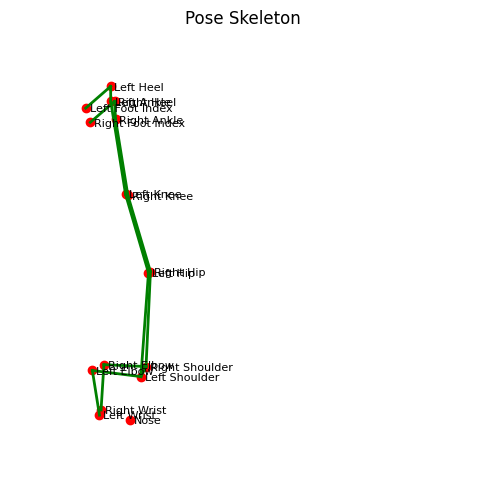

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("PlankTest5_keypoints.csv")  # Change this to your CSV path

# Pick a frame
row = df.sample(1).iloc[0]  # or use a random one: df.sample(1).iloc[0]

# Define matching keypoint indices in your CSV (17 keypoints × 3 = 51 columns)
# This dict must match the order of keypoints saved during preprocessing
important_keypoints = {
    "Nose": 0,
    "Left Shoulder": 1,
    "Right Shoulder": 2,
    "Left Elbow": 3,
    "Right Elbow": 4,
    "Left Wrist": 5,
    "Right Wrist": 6,
    "Left Hip": 7,
    "Right Hip": 8,
    "Left Knee": 9,
    "Right Knee": 10,
    "Left Ankle": 11,
    "Right Ankle": 12,
    "Left Heel": 13,
    "Right Heel": 14,
    "Left Foot Index": 15,
    "Right Foot Index": 16
}

# Extract keypoints
keypoint_coords = {}
for i, (name, idx) in enumerate(important_keypoints.items()):
    x = row[idx * 3] * 600
    y = 600 - row[idx * 3 + 1] * 600  # Flip y for visual alignment
    keypoint_coords[name] = (x, y)

# Define skeleton connections
connections = [
    ("Left Shoulder", "Right Shoulder"),
    ("Left Shoulder", "Left Elbow"), ("Right Shoulder", "Right Elbow"),
    ("Left Elbow", "Left Wrist"), ("Right Elbow", "Right Wrist"),
    ("Left Shoulder", "Left Hip"), ("Right Shoulder", "Right Hip"),
    ("Left Hip", "Right Hip"),
    ("Left Hip", "Left Knee"), ("Right Hip", "Right Knee"),
    ("Left Knee", "Left Ankle"), ("Right Knee", "Right Ankle"),
    ("Left Ankle", "Left Heel"), ("Right Ankle", "Right Heel"),
    ("Left Heel", "Left Foot Index"), ("Right Heel", "Right Foot Index")
]

# Plot
plt.figure(figsize=(6, 6))
for name, (x, y) in keypoint_coords.items():
    plt.scatter(x, y, color='red')
    plt.text(x + 5, y + 5, name, fontsize=8)

for kp1, kp2 in connections:
    if kp1 in keypoint_coords and kp2 in keypoint_coords:
        x1, y1 = keypoint_coords[kp1]
        x2, y2 = keypoint_coords[kp2]
        plt.plot([x1, x2], [y1, y2], 'g-', linewidth=2)

plt.xlim(0, 600)
plt.ylim(0, 600)
plt.gca().invert_yaxis()  # Invert Y to match image orientation
plt.title("Pose Skeleton")
plt.axis("off")
plt.show()
